In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#--------------------------------------------------------------------------------------------------

level = '2'
name = 'lr'
type = f'lr2 (a.u.)'  # ylabel会显示的值  exp(kappa2*x3+omega2)   kappa2*x3  sigmoid(x2) step size of R
save_name = f'{type}'  # gaussian walk   log environmental volatility learning rate at V

# Define sigmoid function
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

# Read data
gamer_x = (pd.read_csv(f"g{name}{level}.csv", header=None)).T
nongamer_x = (pd.read_csv(f"D:\\R2020ml\\bin\\avgp\\changekappa\\n{name}{level}.csv", header=None)).T

# Calculate means and standard deviations
tol_gmean = gamer_x.mean(axis=0).reset_index(drop=True)
tol_nmean = nongamer_x.mean(axis=0).reset_index(drop=True)

# 合并tol_gmean和tol_nmean
combined_means = pd.concat([tol_gmean, tol_nmean], axis=0).T.reset_index(drop=True)

# 计算合并后的总体均值和标准差
overall_mean = combined_means.mean()
overall_std = combined_means.std()

# Calculate the range for ±3 standard deviations
upper_bound = overall_mean + 2*overall_std
lower_bound = overall_mean - 2*overall_std
print(upper_bound)
print(lower_bound)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#--------------------------------------------------------------------------------------------------
gamer_sublst = [32]#
nongamer_sublst = [17, 30]#4,17,18,30
level = '2'
name = 'lr'
type = f'lr2 (a.u.)'  # ylabel会显示的值  exp(kappa2*x3+omega2)   kappa2*x3  sigmoid(x2) step size of R
save_name = f'{type}'  # gaussian walk   log environmental volatility learning rate at V

# Define sigmoid function
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

# Read data
gamer_x = (pd.read_csv(f"g{name}{level}.csv", header=None)).T
nongamer_x = (pd.read_csv(f"n{name}{level}.csv", header=None)).T
# Calculate means and standard deviations
gamer_mean = gamer_x.mean(axis=0).reset_index(drop=True)
nongamer_mean = nongamer_x.mean(axis=0).reset_index(drop=True)
# Plotting
font = {'family': 'Arial', 'weight': 'bold'}
plt.rc('font', **font)
plt.figure(figsize=(6, 3), dpi=120)

# Plot gamer means
plt.plot(gamer_mean, 'o-', color='indianred', label='Gamer', markersize=2)  # Connect points with lines
for idx in gamer_sublst:
    plt.plot(idx, gamer_mean[idx], 'o', color='black', markersize=2)  # Highlight specific points

# Plot nongamer means
plt.plot(nongamer_mean, 'o-', color='steelblue', label='Nongamer', markersize=2)  # Connect points with lines
for idx in nongamer_sublst:
    plt.plot(idx, nongamer_mean[idx], 'o', color='black', markersize=2)  # Highlight specific points

plt.axhline(y=2.62, color='#7f8c8d', linestyle='--', linewidth=1, label='out of ± 2SD')
plt.axhline(y=lower_bound, color='#7f8c8d', linestyle='--', linewidth=1)

# plt.axhline(y=lower_bound, color='#7f8c8d', linestyle='--', linewidth=1.5, label='Threshold')

plt.ylabel(f"{type}", fontsize=10, fontdict=font)
plt.legend(fontsize=7, prop=font)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.tick_params(axis='both', which='major', width=1.5)
ax.tick_params(axis='both', which='minor', width=1.5)

plt.tight_layout()
plt.show()


In [ ]:
import pickle
import pandas as pd
import numpy as np
path = r"param.xlsx"
data = pd.read_excel(path)
dict_mat = {}
dict_mat['gamer'] = {}
dict_mat['gamer']['kappa'] = data['kappag'].dropna()
dict_mat['gamer']['logkappa'] = np.log(data['kappag'].dropna())
dict_mat['gamer']['omega2'] = data['om2g'].dropna()
dict_mat['gamer']['omega3'] = data['om3g'].dropna()
dict_mat['gamer']['zeta'] = data['zetag'].dropna()
dict_mat['gamer']['theta'] = np.exp(data['om3g'].dropna())
dict_mat['nongamer'] = {}
dict_mat['nongamer']['kappa'] = data['kappa'].dropna()
dict_mat['nongamer']['logkappa'] = np.log(data['kappa'].dropna())
dict_mat['nongamer']['omega2'] = data['om2'].dropna()
dict_mat['nongamer']['omega3'] = data['om3'].dropna()
dict_mat['nongamer']['theta'] = np.exp(data['om3'].dropna())
dict_mat['nongamer']['zeta'] = data['zeta'].dropna()
output_path = r"param.pkl"
with open(output_path,'wb') as file:
    pickle.dump(dict_mat,file)


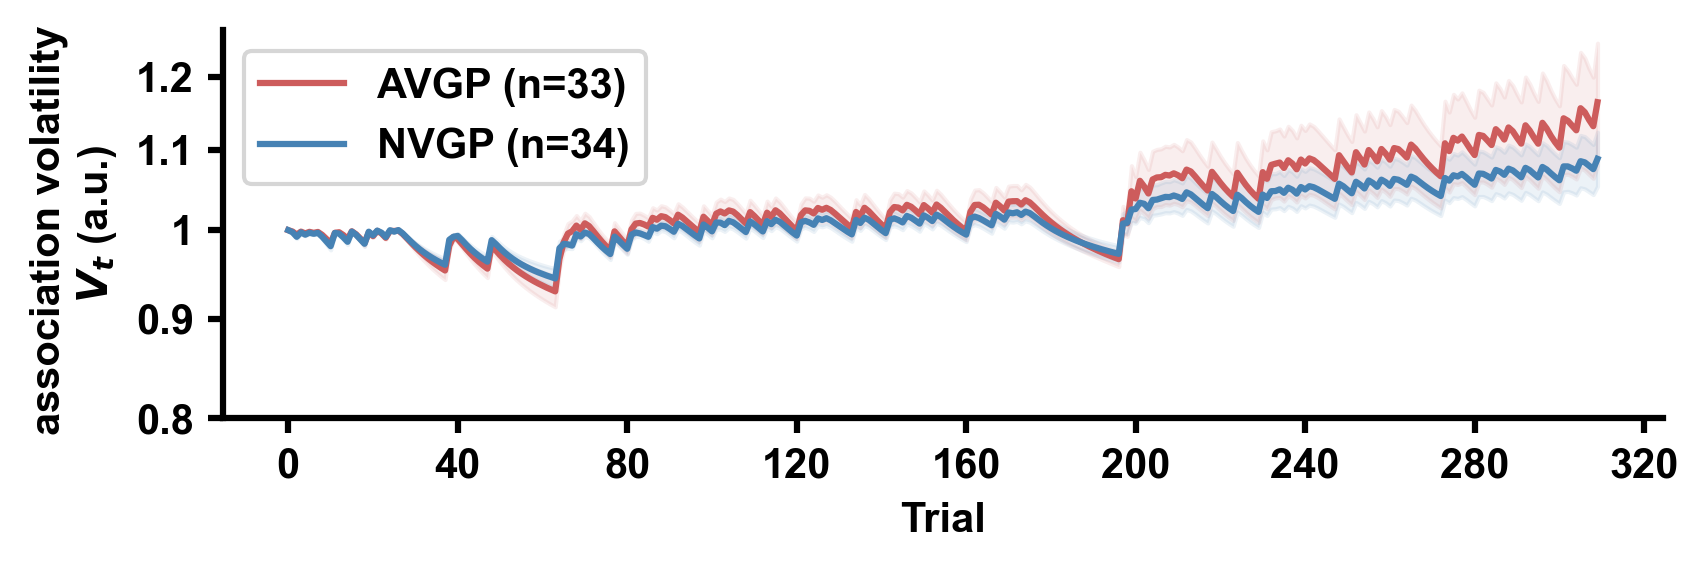

In [3]:
#draw association learning rate
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
#--------------------------------------------------------------------------------------------------
# remove extreme
gamer_sublst = [32]
nongamer_sublst =[17, 30]

level = '3'
name='mu' 
raw_gamer = (pd.read_csv(f"g{name}{level}.csv",header=None,usecols=list(range(0,310)))).T  #,usecols=list(range(10,310)) 读取的x2需要过sigmoid， x3需要take log
raw_nongamer = (pd.read_csv(f"n{name}{level}.csv",header=None,usecols=list(range(0,310)))).T
type='association volatility \n$V_t$ (a.u.)'
line_red=1.5
line_blue=1.5
gamer =(raw_gamer)
nongamer = (raw_nongamer)
#--------------------------------------------------------------------------------------------------------
gamer_x = pd.DataFrame()
nongamer_x = pd.DataFrame()
gamer_traj = pd.DataFrame()
nongamer_traj = pd.DataFrame()
for i in range(gamer.shape[1]):
    filter_sub = i
    if filter_sub not in gamer_sublst:
        gamer_x[i] = gamer[i]
    else:pass
for i in range(nongamer.shape[1]):
    filter_sub = i
    if filter_sub not in nongamer_sublst:
        nongamer_x[i] = nongamer[i]
    else:pass 
#---------------------------------------------------------------------------
gamer_mean = gamer_x.mean(axis=1)
gamer_std = gamer_x.sem(axis=1)
nongamer_mean = nongamer_x.mean(axis=1)
nongamer_std = nongamer_x.sem(axis=1)
#---------------------------------------------------------------------------
# Set font family and size
font = {'family': 'Arial', 'weight': 'bold'}
# Apply the font settings
plt.rc('font', **font)
gamercount = gamer_x.shape[1]
nongamercount = nongamer_x.shape[1]
plt.figure(figsize=(5.8, 2), dpi=300)
plt.plot(gamer_mean, 'indianred', label='AVGP'+' '+ f'(n={gamercount})', linewidth=line_red)
plt.plot(nongamer_mean, 'steelblue', label='NVGP'+' '+ f'(n={nongamercount})', linewidth=line_blue)
plt.fill_between(range(gamer.shape[0]), gamer_mean - gamer_std, gamer_mean + gamer_std, color='indianred', alpha=0.1)
plt.fill_between(range(nongamer.shape[0]), nongamer_mean - nongamer_std, nongamer_mean + nongamer_std, color='steelblue', alpha=0.1)
plt.xlabel("Trial", fontsize=10, fontdict=font)
plt.ylabel(f"{type}", fontsize=10, fontdict=font)
plt.legend(fontsize=7, prop=font)
plt.yscale('log')
plt.yticks([0.8, 0.9, 1, 1.1, 1.2], ['0.8','0.9', '1', '1.1', '1.2'], fontsize=10)
plt.xticks([0, 40, 80, 120, 160, 200, 240, 280, 320],fontsize=10)
# 设置框线样式
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # 设置 x 轴的线宽
ax.spines['left'].set_linewidth(1.5)  # 设置 y 轴的线宽
ax.tick_params(axis='both', which='major', width=1.5)
ax.tick_params(axis='both', which='minor', width=1.5)
plt.legend().remove
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
#--------------------------------------------------------------------------------------------------
gamer_sublst = [32]
nongamer_sublst =[17, 30]
level = '2'
name='lr' 
raw_gamer = (pd.read_csv(f"g{name}{level}.csv",header=None,usecols=list(range(0,310)))).T  #,usecols=list(range(10,310)) 读取的x2需要过sigmoid， x3需要take log
raw_nongamer = (pd.read_csv(f"n{name}{level}.csv",header=None,usecols=list(range(0,310)))).T
type='association learning \nrate $\\alpha_t^R$ (a.u.)'
line_red=1.5
line_blue=1
gamer = np.log(raw_gamer)
nongamer = np.log(raw_nongamer)
#--------------------------------------------------------------------------------------------------------
gamer_x = pd.DataFrame()
nongamer_x = pd.DataFrame()
gamer_traj = pd.DataFrame()
nongamer_traj = pd.DataFrame()
for i in range(gamer.shape[1]):
    filter_sub = i
    if filter_sub not in gamer_sublst:
        gamer_x[i] = gamer[i]
    else:pass
for i in range(nongamer.shape[1]):
    filter_sub = i
    if filter_sub not in nongamer_sublst:
        nongamer_x[i] = nongamer[i]
    else:pass 
#---------------------------------------------------------------------------
gamer_mean = gamer_x.mean(axis=1)
gamer_std = gamer_x.sem(axis=1)
nongamer_mean = nongamer_x.mean(axis=1)
nongamer_std = nongamer_x.sem(axis=1)
#---------------------------------------------------------------------------
# Set font family and size
font = {'family': 'Arial', 'weight': 'bold'}
# Apply the font settings
plt.rc('font', **font)
gamercount = gamer_x.shape[1]
nongamercount = nongamer_x.shape[1]
plt.figure(figsize=(5.8, 2), dpi=300)
plt.plot(gamer_mean, 'indianred', label='AVGP'+' '+ f'(n={gamercount})', linewidth=line_red)
plt.plot(nongamer_mean, 'steelblue', label='NVGP'+' '+ f'(n={nongamercount})', linewidth=line_blue)
plt.fill_between(range(gamer.shape[0]), gamer_mean - gamer_std, gamer_mean + gamer_std, color='indianred', alpha=0.1)
plt.fill_between(range(nongamer.shape[0]), nongamer_mean - nongamer_std, nongamer_mean + nongamer_std, color='steelblue', alpha=0.1)
plt.xlabel("Trial", fontsize=10, fontdict=font)
plt.ylabel(f"{type}", fontsize=10, fontdict=font)
plt.legend(fontsize=7, prop=font)
plt.yticks([-1.5, -1,-0.5], ['-1.5','-1','-0.5'], fontsize=10)
plt.xticks([0, 40, 80, 120, 160, 200, 240, 280, 320],fontsize=10)
# 设置框线样式
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # 设置 x 轴的线宽
ax.spines['left'].set_linewidth(1.5)  # 设置 y 轴的线宽
ax.tick_params(axis='both', which='major', width=1.5)
ax.tick_params(axis='both', which='minor', width=1.5)
plt.legend().remove
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
#--------------------------------------------------------------------------------------------------
gamer_sublst = [32]
nongamer_sublst =[17, 30]
level = '1'
name='da' 
raw_gamer = (pd.read_csv(f"g{name}{level}.csv",header=None,usecols=list(range(0,310)))).T  #,usecols=list(range(10,310)) 读取的x2需要过sigmoid， x3需要take log
raw_nongamer = (pd.read_csv(f"n{name}{level}.csv",header=None,usecols=list(range(0,310)))).T
type='association prediction \n errors $PE_t^R$ (a.u.)'
line_red=1.5
line_blue=1
gamer = raw_gamer
nongamer = raw_nongamer
#--------------------------------------------------------------------------------------------------------
gamer_x = pd.DataFrame()
nongamer_x = pd.DataFrame()
gamer_traj = pd.DataFrame()
nongamer_traj = pd.DataFrame()
for i in range(gamer.shape[1]):
    filter_sub = i
    if filter_sub not in gamer_sublst:
        gamer_x[i] = gamer[i]
    else:pass
for i in range(nongamer.shape[1]):
    filter_sub = i
    if filter_sub not in nongamer_sublst:
        nongamer_x[i] = nongamer[i]
    else:pass 
  
#---------------------------------------------------------------------------
gamer_mean = gamer_x.mean(axis=1)
gamer_std = gamer_x.sem(axis=1)
nongamer_mean = nongamer_x.mean(axis=1)
nongamer_std = nongamer_x.sem(axis=1)
#---------------------------------------------------------------------------
# Set font family and size
font = {'family': 'Arial', 'weight': 'bold'}
# Apply the font settings
plt.rc('font', **font)
gamercount = gamer_x.shape[1]
nongamercount = nongamer_x.shape[1]
plt.figure(figsize=(5.8, 2), dpi=300)
plt.plot(gamer_mean, 'indianred', label='AVGP'+' '+ f'(n={gamercount})', linewidth=line_red)
plt.plot(nongamer_mean, 'steelblue', label='NVGP'+' '+ f'(n={nongamercount})', linewidth=line_blue)
plt.fill_between(range(gamer.shape[0]), gamer_mean - gamer_std, gamer_mean + gamer_std, color='indianred', alpha=0.1)
plt.fill_between(range(nongamer.shape[0]), nongamer_mean - nongamer_std, nongamer_mean + nongamer_std, color='steelblue', alpha=0.1)
plt.xlabel("Trial", fontsize=10, fontdict=font)
plt.ylabel(f"{type}", fontsize=10, fontdict=font)
plt.legend(fontsize=7, prop=font)
plt.yticks([0, 0.5, 1, 1.5], ['0','0.5', '1', '1.5'], fontsize=10)
plt.xticks([0, 40, 80, 120, 160, 200, 240, 280, 320],fontsize=10)
# 设置框线样式
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # 设置 x 轴的线宽
ax.spines['left'].set_linewidth(1.5)  # 设置 y 轴的线宽
ax.tick_params(axis='both', which='major', width=1.5)
ax.tick_params(axis='both', which='minor', width=1.5)
plt.legend().remove
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
#--------------------------------------------------------------------------------------------------
output_path = r"param.pkl"
with open(output_path,'rb')as file:
    data = pickle.load(file)
def sigmoid(x):
    y =1/(1+np.exp(-x))
    return y
gamer_sublst = [32]
nongamer_sublst =[17, 30]
level = '3'
name='mu' 
raw_gamer = (pd.read_csv(f"g{name}{level}.csv",header=None,usecols=list(range(0,310)))).T  #,usecols=list(range(10,310)) 读取的x2需要过sigmoid， x3需要take log
raw_nongamer = (pd.read_csv(f"n{name}{level}.csv",header=None,usecols=list(range(0,310)))).T
type = f'association variance\n ${{\\kappa*V_{{t-1}}+\\omega}}$ (a.u.)'
line_red=1.5
line_blue=1.5
gamer =(raw_gamer)
nongamer = (raw_nongamer)
#--------------------------------------------------------------------------------------------------------
gamer_x = pd.DataFrame()
nongamer_x = pd.DataFrame()
gamer_traj = pd.DataFrame()
nongamer_traj = pd.DataFrame() 
for i in range(gamer.shape[1]):
    filter_sub = i
    if filter_sub not in gamer_sublst:
        gamer_traj[i] = ((data['gamer']['kappa'][i]) * gamer[i] + data['gamer']['omega2'][i])
    else:pass
for i in range(nongamer.shape[1]):  
    filter_sub = i
    if filter_sub not in nongamer_sublst:  
        nongamer_traj[i] = ((data['nongamer']['kappa'][i]) * nongamer[i] + data['nongamer']['omega2'][i])
    else:pass  
#---------------------------------------------------------------------------
gamer_mean = gamer_traj.mean(axis=1)
gamer_std = gamer_traj.sem(axis=1)
nongamer_mean = nongamer_traj.mean(axis=1)
nongamer_std = nongamer_traj.sem(axis=1)
#---------------------------------------------------------------------------
# Set font family and size
font = {'family': 'Arial', 'weight': 'bold'}
# Apply the font settings
plt.rc('font', **font)
gamercount = gamer_traj.shape[1]
nongamercount = nongamer_traj.shape[1]
plt.figure(figsize=(5.8, 2), dpi=300)
plt.plot(gamer_mean, 'indianred', label='AVGP'+' '+ f'(n={gamercount})', linewidth=line_red)
plt.plot(nongamer_mean, 'steelblue', label='NVGP'+' '+ f'(n={nongamercount})', linewidth=line_blue)
plt.fill_between(range(gamer.shape[0]), gamer_mean - gamer_std, gamer_mean + gamer_std, color='indianred', alpha=0.1)
plt.fill_between(range(nongamer.shape[0]), nongamer_mean - nongamer_std, nongamer_mean + nongamer_std, color='steelblue', alpha=0.1)
plt.xlabel("Trial", fontsize=10, fontdict=font)
plt.ylabel(f"{type}", fontsize=10, fontdict=font)
plt.legend(fontsize=7, prop=font)
plt.xticks([0, 40, 80, 120, 160, 200, 240, 280, 320],fontsize=10)
# 设置框线样式
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # 设置 x 轴的线宽
ax.spines['left'].set_linewidth(1.5)  # 设置 y 轴的线宽
ax.tick_params(axis='both', which='major', width=1.5)
ax.tick_params(axis='both', which='minor', width=1.5)
plt.legend().remove
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
#--------------------------------------------------------------------------------------------------
gamer_sublst = [32]
nongamer_sublst =[17, 30]
level = '3'
name='lr' 
raw_gamer = (pd.read_csv(f"g{name}{level}.csv",header=None,usecols=list(range(0,310)))).T  #,usecols=list(range(10,310)) 读取的x2需要过sigmoid， x3需要take log
raw_nongamer = (pd.read_csv(f"n{name}{level}.csv",header=None,usecols=list(range(0,310)))).T
type='volatility learning \n rate $\\alpha_t^V$ (a.u.)'
line_red=1.5
line_blue=1.5
save_name='lr3'
gamer = raw_gamer
nongamer = raw_nongamer
#--------------------------------------------------------------------------------------------------------
gamer_x = pd.DataFrame()
nongamer_x = pd.DataFrame()
gamer_traj = pd.DataFrame()
nongamer_traj = pd.DataFrame()
for i in range(gamer.shape[1]):
    filter_sub = i
    if filter_sub not in gamer_sublst:
        gamer_x[i] = gamer[i]
    else:pass
for i in range(nongamer.shape[1]):
    filter_sub = i
    if filter_sub not in nongamer_sublst:
        nongamer_x[i] = nongamer[i]
    else:pass 
#---------------------------------------------------------------------------
gamer_mean = gamer_x.mean(axis=1)
gamer_std = gamer_x.sem(axis=1)
nongamer_mean = nongamer_x.mean(axis=1)
nongamer_std = nongamer_x.sem(axis=1)
#---------------------------------------------------------------------------
# Set font family and size
font = {'family': 'Arial', 'weight': 'bold'}
# Apply the font settings
plt.rc('font', **font)
gamercount = gamer_x.shape[1]
nongamercount = nongamer_x.shape[1]
plt.figure(figsize=(5.8, 2), dpi=300)
plt.plot(gamer_mean, 'indianred', label='AVGP'+' '+ f'(n={gamercount})', linewidth=line_red)
plt.plot(nongamer_mean, 'steelblue', label='NVGP'+' '+ f'(n={nongamercount})', linewidth=line_blue)
plt.fill_between(range(gamer.shape[0]), gamer_mean - gamer_std, gamer_mean + gamer_std, color='indianred', alpha=0.1)
plt.fill_between(range(nongamer.shape[0]), nongamer_mean - nongamer_std, nongamer_mean + nongamer_std, color='steelblue', alpha=0.1)
plt.xlabel("Trial", fontsize=10, fontdict=font)
plt.ylabel(f"{type}", fontsize=10, fontdict=font)
plt.legend(fontsize=7, prop=font)
plt.yscale('log')
plt.yticks([0.05, 0.1,0.15], ['0.05','0.1','0.15'], fontsize=10)
plt.xticks([0, 40, 80, 120, 160, 200, 240, 280, 320],fontsize=10)
# 设置框线样式
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # 设置 x 轴的线宽
ax.spines['left'].set_linewidth(1.5)  # 设置 y 轴的线宽
ax.tick_params(axis='both', which='major', width=1.5)
ax.tick_params(axis='both', which='minor', width=1.5)
plt.legend().remove
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
#--------------------------------------------------------------------------------------------------
# 筛选标准为lr2上均值超过0.32 的被试(控制过度被PE受到影响的被试) 
gamer_sublst = [32]
nongamer_sublst =[17, 30]
level = '3'
name='sahat' 
raw_gamer = (pd.read_csv(f"g{name}{level}.csv",header=None,usecols=list(range(0,310)))).T  #,usecols=list(range(10,310)) 读取的x2需要过sigmoid， x3需要take log
raw_nongamer = (pd.read_csv(f"n{name}{level}.csv",header=None,usecols=list(range(0,310)))).T
type = 'unweighted learning \n rate $\\bar\\alpha_t^V$ (a.u.)'
line_red=1.5
line_blue=1.5
gamer = raw_gamer
nongamer = raw_nongamer
#--------------------------------------------------------------------------------------------------------
gamer_x = pd.DataFrame()
nongamer_x = pd.DataFrame()
gamer_traj = pd.DataFrame()
nongamer_traj = pd.DataFrame()
for i in range(gamer.shape[1]):
    filter_sub = i
    if filter_sub not in gamer_sublst:
        gamer_x[i] = gamer[i]
    else:pass
for i in range(nongamer.shape[1]):
    filter_sub = i
    if filter_sub not in nongamer_sublst:
        nongamer_x[i] = nongamer[i]
    else:pass 
#---------------------------------------------------------------------------
gamer_mean = gamer_x.mean(axis=1)
gamer_std = gamer_x.sem(axis=1)
nongamer_mean = nongamer_x.mean(axis=1)
nongamer_std = nongamer_x.sem(axis=1)
#---------------------------------------------------------------------------
# Set font family and size
font = {'family': 'Arial', 'weight': 'bold'}
# Apply the font settings
plt.rc('font', **font)
gamercount = gamer_x.shape[1]
nongamercount = nongamer_x.shape[1]
plt.figure(figsize=(5.8, 2), dpi=300)
plt.plot(gamer_mean, 'indianred', label='AVGP'+' '+ f'(n={gamercount})', linewidth=line_red)
plt.plot(nongamer_mean, 'steelblue', label='NVGP'+' '+ f'(n={nongamercount})', linewidth=line_blue)
plt.fill_between(range(gamer.shape[0]), gamer_mean - gamer_std, gamer_mean + gamer_std, color='indianred', alpha=0.1)
plt.fill_between(range(nongamer.shape[0]), nongamer_mean - nongamer_std, nongamer_mean + nongamer_std, color='steelblue', alpha=0.1)
plt.xlabel("Trial", fontsize=10, fontdict=font)
plt.ylabel(f"{type}", fontsize=10, fontdict=font)
plt.legend(fontsize=7, prop=font)
plt.yscale('log')
plt.yticks([1,2, 3, 4], [ '1','2', '3', '4'], fontsize=10)
plt.xticks([0, 40, 80, 120, 160, 200, 240, 280, 320],fontsize=10)
# 设置框线样式
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # 设置 x 轴的线宽
ax.spines['left'].set_linewidth(1.5)  # 设置 y 轴的线宽
ax.tick_params(axis='both', which='major', width=1.5)
ax.tick_params(axis='both', which='minor', width=1.5)
plt.legend().remove
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
#--------------------------------------------------------------------------------------------------
# 筛选标准为lr2上均值超过0.32 的被试(控制过度被PE受到影响的被试) 
gamer_sublst = [32]
nongamer_sublst =[17, 30]
level = '2'
name='w' 
raw_gamer = (pd.read_csv(f"g{name}{level}.csv",header=None,usecols=list(range(0,310)))).T  #,usecols=list(range(10,310)) 读取的x2需要过sigmoid， x3需要take log
raw_nongamer = (pd.read_csv(f"n{name}{level}.csv",header=None,usecols=list(range(0,310)))).T
type='precision weighting \n $w_t^V$ (a.u.)'
line_red=1.5
line_blue=1.5
gamer = raw_gamer
nongamer = raw_nongamer
#--------------------------------------------------------------------------------------------------------
gamer_x = pd.DataFrame()
nongamer_x = pd.DataFrame()
gamer_traj = pd.DataFrame()
nongamer_traj = pd.DataFrame()
for i in range(gamer.shape[1]):
    filter_sub = i
    if filter_sub not in gamer_sublst:
        gamer_x[i] = gamer[i]
    else:pass
for i in range(nongamer.shape[1]):
    filter_sub = i
    if filter_sub not in nongamer_sublst:
        nongamer_x[i] = nongamer[i]
    else:pass 
#---------------------------------------------------------------------------
gamer_mean = gamer_x.mean(axis=1)
gamer_std = gamer_x.sem(axis=1)
nongamer_mean = nongamer_x.mean(axis=1)
nongamer_std = nongamer_x.sem(axis=1)
#---------------------------------------------------------------------------
# Set font family and size
font = {'family': 'Arial', 'weight': 'bold'}
# Apply the font settings
plt.rc('font', **font)
gamercount = gamer_x.shape[1]
nongamercount = nongamer_x.shape[1]
plt.figure(figsize=(5.8, 2), dpi=300)
#plt.plot(real_traj, 'black', linewidth=1.5)
plt.plot(gamer_mean, 'indianred', label='AVGP'+' '+ f'(n={gamercount})', linewidth=line_red)
plt.plot(nongamer_mean, 'steelblue', label='NVGP'+' '+ f'(n={nongamercount})', linewidth=line_blue)
plt.fill_between(range(gamer.shape[0]), gamer_mean - gamer_std, gamer_mean + gamer_std, color='indianred', alpha=0.1)
plt.fill_between(range(nongamer.shape[0]), nongamer_mean - nongamer_std, nongamer_mean + nongamer_std, color='steelblue', alpha=0.1)
plt.xlabel("Trial", fontsize=10, fontdict=font)
plt.ylabel(f"{type}", fontsize=10, fontdict=font)
plt.legend(fontsize=7, prop=font)
plt.yscale('log')
plt.yticks([0.1, 0.2, 0.3, 0.4], ['0.1','0.2', '0.3', '0.4'], fontsize=10)
plt.xticks([0, 40, 80, 120, 160, 200, 240, 280, 320],fontsize=10)
# 设置框线样式
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # 设置 x 轴的线宽
ax.spines['left'].set_linewidth(1.5)  # 设置 y 轴的线宽
ax.tick_params(axis='both', which='major', width=1.5)
ax.tick_params(axis='both', which='minor', width=1.5)
plt.legend().remove
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
#--------------------------------------------------------------------------------------------------s
# 筛选标准为lr2上均值超过0.32 的被试(控制过度被PE受到影响的被试) 
gamer_sublst = [32]
nongamer_sublst =[17, 30]
level = '2'
name='da' 
raw_gamer = (pd.read_csv(f"g{name}{level}.csv",header=None,usecols=list(range(0,310)))).T  #,usecols=list(range(10,310)) 读取的x2需要过sigmoid， x3需要take log
raw_nongamer = (pd.read_csv(f"n{name}{level}.csv",header=None,usecols=list(range(0,310)))).T
type='volatility prediction \n errors $PE_t^V$ (a.u.)'
line_red=1.5
line_blue=1
gamer = raw_gamer
nongamer = raw_nongamer
#--------------------------------------------------------------------------------------------------------
gamer_x = pd.DataFrame()
nongamer_x = pd.DataFrame()
gamer_traj = pd.DataFrame()
nongamer_traj = pd.DataFrame()
for i in range(gamer.shape[1]):
    filter_sub = i
    if filter_sub not in gamer_sublst:
        gamer_x[i] = gamer[i]
    else:pass
for i in range(nongamer.shape[1]):
    filter_sub = i
    if filter_sub not in nongamer_sublst:
        nongamer_x[i] = nongamer[i]
    else:pass   
#---------------------------------------------------------------------------
gamer_mean = gamer_x.mean(axis=1)
gamer_std = gamer_x.sem(axis=1)
nongamer_mean = nongamer_x.mean(axis=1)
nongamer_std = nongamer_x.sem(axis=1)
#---------------------------------------------------------------------------
# Set font family and size
font = {'family': 'Arial', 'weight': 'bold'}
# Apply the font settings
plt.rc('font', **font)
gamercount = gamer_x.shape[1]
nongamercount = nongamer_x.shape[1]
plt.figure(figsize=(5.8, 2), dpi=300)
#plt.plot(real_traj, 'black', linewidth=1.5)
plt.plot(gamer_mean, 'indianred', label='AVGP'+' '+ f'(n={gamercount})', linewidth=line_red)
plt.plot(nongamer_mean, 'steelblue', label='NVGP'+' '+ f'(n={nongamercount})', linewidth=line_blue)
plt.fill_between(range(gamer.shape[0]), gamer_mean - gamer_std, gamer_mean + gamer_std, color='indianred', alpha=0.1)
plt.fill_between(range(nongamer.shape[0]), nongamer_mean - nongamer_std, nongamer_mean + nongamer_std, color='steelblue', alpha=0.1)
plt.xlabel("Trial", fontsize=10, fontdict=font)
plt.ylabel(f"{type}", fontsize=10, fontdict=font)
plt.legend(fontsize=7, prop=font)
plt.yticks([0, 0.5, 1, 1.5], ['0','0.5', '1', '1.5'], fontsize=10)
plt.xticks([0, 40, 80, 120, 160, 200, 240, 280, 320],fontsize=10)
# 设置框线样式
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # 设置 x 轴的线宽
ax.spines['left'].set_linewidth(1.5)  # 设置 y 轴的线宽
ax.tick_params(axis='both', which='major', width=1.5)
ax.tick_params(axis='both', which='minor', width=1.5)
plt.legend().remove
plt.tight_layout()
plt.show()